In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
task1_df = pd.read_csv("../data/entry_anonymous.csv")

In [3]:
demo_columns = ['entry-demo-1', 'entry-demo-2', 'entry-demo-3', 'entry-demo-4', 'entry-demo-5']
column_labels = {
    'entry-demo-1': 'Gender',
    'entry-demo-2': 'Age',
    'entry-demo-3': 'Country',
    'entry-demo-4': 'Role',
    'entry-demo-5': 'Java Level'
}
category_orders = {
    'entry-demo-1': ['Man', 'Woman', 'Undisclosed'],
    'entry-demo-2': ['20-29', '30-39', '40-49', '50-59', '60-69', 'Undisclosed'],
    'entry-demo-4': ['Student', 'Hobbyist', 'Researcher', 'Professional', 'Undisclosed'], 
    'entry-demo-5': ['Beginner', 'Intermediate', 'Advanced']
}

## Sample demographics

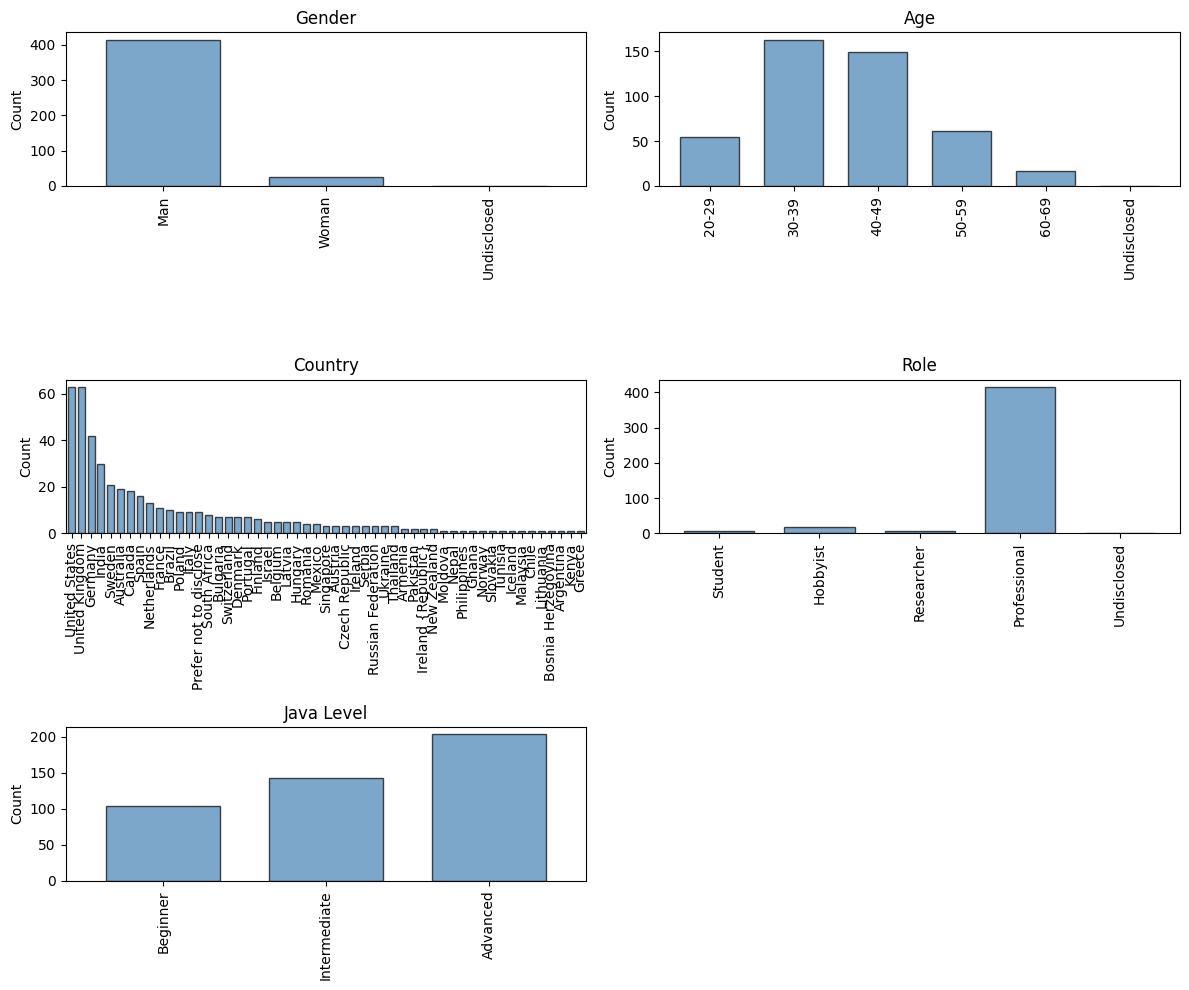

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dynamically adjust the layout to fit 5 subplots (3 rows, 2 columns)
plt.figure(figsize=(12, 10))

for i, column in enumerate(demo_columns, 1):
    plt.subplot(3, 2, i)  # Arrange in a 3x2 grid

    if column in category_orders:
        preferred_order = category_orders[column]

        # Convert to categorical with the specified order
        task1_df[column] = pd.Categorical(task1_df[column], categories=preferred_order, ordered=True)

        # Calculate value counts and reindex using the preferred order
        value_counts = task1_df[column].value_counts().reindex(preferred_order, fill_value=0)
    else:
        # No predefined order, use raw value counts
        value_counts = task1_df[column].value_counts()

    # Plot the counts
    if not value_counts.empty:
        value_counts.plot(kind='bar', ax=plt.gca(), color='steelblue', edgecolor='black', alpha=0.7, width=0.7)

        plt.title(f'{column_labels[column]}')  # Use the provided column label
        plt.xlabel('')  # Hide column name on x-axis
        plt.ylabel('Count')
    else:
        plt.title(f'{column_labels[column]} - No Data Available')
        plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
likert_columns = ['entry-ai-2', 'entry-ai-3', 'entry-ai-4', 'entry-ai-5', 'entry-ai-6', 
                  'entry-ai-7', 'entry-ai-8', 'entry-ai-9', 'entry-ai-10']
column_labels = {
    'entry-ai-2': 'Habitual user',
    'entry-ai-3': 'More productive',
    'entry-ai-4': 'Faster completion',
    'entry-ai-5': 'Less time searching',
    'entry-ai-6': 'Repetitive programming faster',
    'entry-ai-7': 'Stay in flow',
    'entry-ai-8': 'AI is distracting (INVERTED)',
    'entry-ai-9': 'More fulfilled',
    'entry-ai-10': 'Focus on satisfying'
}

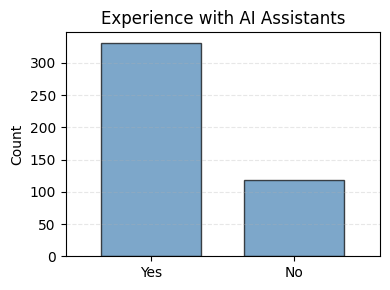

In [6]:
# Count "Yes" and "No" responses for all participants (entire sample)
ai_experience_counts = task1_df['entry-ai-1'].value_counts()

# Plot the bar chart
plt.figure(figsize=(4, 3))
ai_experience_counts.plot(kind='bar', color='steelblue', alpha=0.7, edgecolor='black', width=0.7)

# Formatting
plt.title('Experience with AI Assistants')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


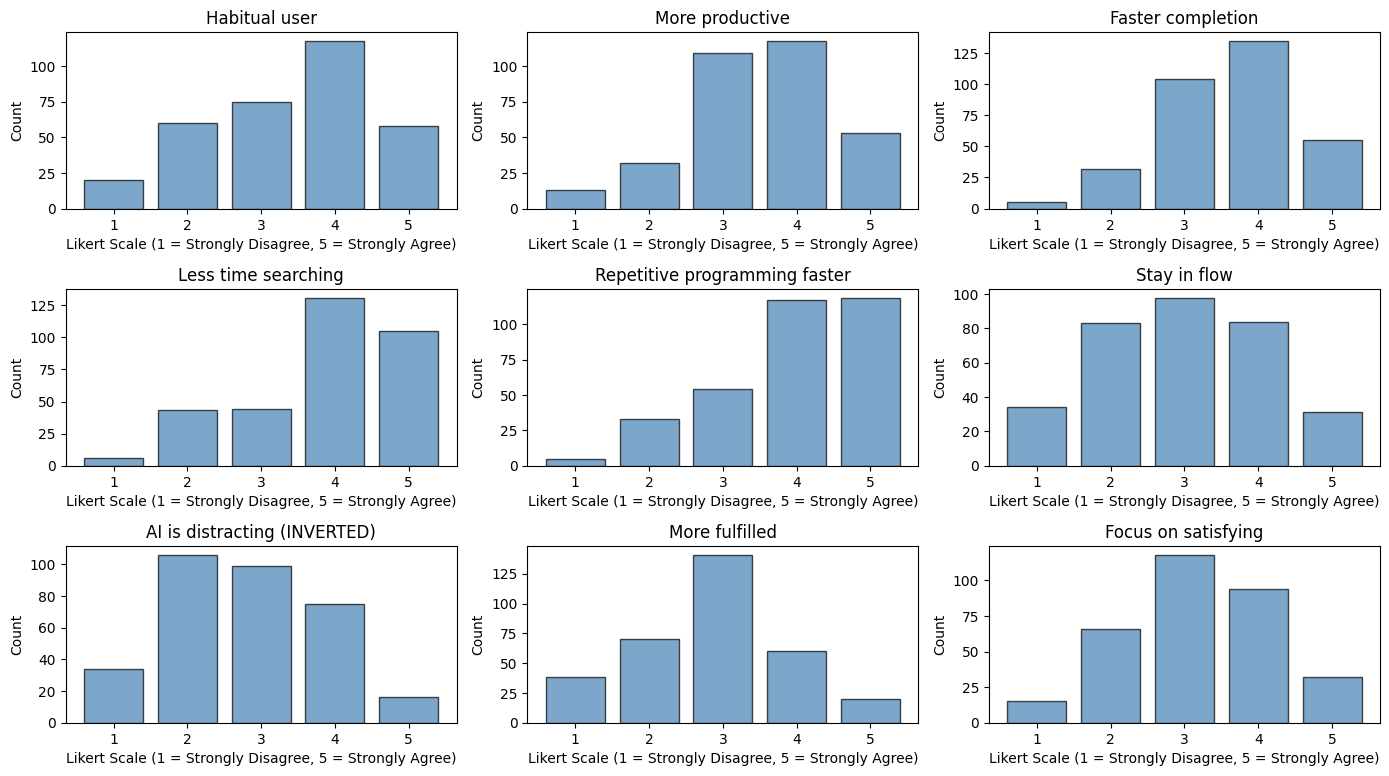

In [7]:
# Step 2: Visualize Likert scale distributions with a 4x3 grid layout
plt.figure(figsize=(14, 10))

for i, column in enumerate(likert_columns, 1):
    plt.subplot(4, 3, i)  # Arrange subplots in a 4x3 grid

    # Compute counts and reindex to ensure all Likert scale values (1-5) are present
    likert_counts = task1_df[column].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

    # Create a single bar plot
    likert_counts.plot(kind='bar', ax=plt.gca(), color='steelblue', alpha=0.7, edgecolor='black', width=0.8)

    # Set title and labels
    plt.title(column_labels[column])  # Use descriptive labels
    plt.xlabel('Likert Scale (1 = Strongly Disagree, 5 = Strongly Agree)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)  # Ensure labels are horizontal

plt.tight_layout()
plt.show()
